In [1]:
# Using numpy for numeric operations
import numpy as np
# Using matplotlib for plotting
import matplotlib.pyplot as plt
# Using scikit-learn for evaluting the matrix and utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.exceptions import UndefinedMetricWarning
# Using warning because in result section facing unessacry warning
import warnings

In [2]:
# Here, Dataset Generation
np.random.seed(0) # I'm using reandom.seed() because each time the code run, it will provide the same random number
num_samples_per_class = 100 # Here, defing the variable the number of sample per class in dataset
class_0_features = np.random.randn(num_samples_per_class, 2) + np.array([2, 2]) 
# In here, generating the random samples for 1st class.where distribution mean to [2,2]
class_1_features = np.random.randn(num_samples_per_class, 2) + np.array([2, -2]) # Same as 1st but here [2,-2]
class_2_features = np.random.randn(num_samples_per_class, 2) + np.array([-2, 2]) #Same as 2nd but [2,2]
class_3_features = np.random.randn(num_samples_per_class, 2) + np.array([-2, -2]) #mean of class [-2,-2]
class_4_features = np.random.randn(num_samples_per_class, 2) + np.array([0, 0]) #[0,0]
X = np.vstack([class_0_features, class_1_features, class_2_features, class_3_features, class_4_features]) 
# Here, vertically stacks the feature arrays for all classes into a single array 
Y = np.array([0] * num_samples_per_class + [1] * num_samples_per_class + [2] * num_samples_per_class + 
             [3] * num_samples_per_class + [4] * num_samples_per_class)
# Here,array Y containing the class labels and it will repeated num_samples_per_class times for each class.
# Here, shuffle the feature matrix X and the corresponding labels Y using the shuffled indices. 
# And ensures that the dataset is randomly ordered
shuffle_indices = np.arange(X.shape[0])
np.random.shuffle(shuffle_indices)
X = X[shuffle_indices]
Y = Y[shuffle_indices]

In [3]:
# Here, Convert class labels to one-hot encoding
Y_onehot = np.zeros((Y.shape[0], len(np.unique(Y))))
for i in range(len(Y)):
    Y_onehot[i, Y[i]] = 1

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size=0.2, random_state=42)
# Here,Splitting for training and testing sets with 80% for training and 20% for testing, ensuring reproducibility with random_state=42

In [4]:
# Neural Network Implementation
class NeuralNetwork(object):
    # Here, I initializing the neural network with specified hidden layer sizes and learning rate
    def __init__(self, hidden_layers=(10, 10, 10), learning_rate=0.2):
        inputLayerNeurons = 2 # Input layer to 2
        hiddenLayerNeurons1, hiddenLayerNeurons2, hiddenLayerNeurons3 = hidden_layers # Unpack the hidden layer sizes from the tuple
        outLayerNeurons = 5  # Five classes
         # Storing the learning rate
        self.learning_rate = learning_rate
        # Weights initialization for imput and 3 hidden layer
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_HI2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_HI3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_OH = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)
        
    def softmax(self, x):
        # Compute softmax activation function for each sample in the input array x
        # Subtract the maximum value from each element to prevent overflow
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        # Normalize the exponentiated values by dividing by the sum along the axis 1
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)
    '''
    We know, 
    Softmax activation function is applied in output layer for multi-class classification. 
    It transforms the output values into probabilities for each class, ensuring they sum to 1. 
    It takes a vector of input values (x) and applies the softmax mathematical formula:
    softmax(x_i) = exp(x_i) / sum(exp(x_j) for all j)
    '''
    # Forward propagation
    def feedForward(self, X):
        # Compute the input to the first hidden layer by taking the dot product of input X and weights W_HI1
        self.hidden_input1 = np.dot(X, self.W_HI1)
        # Apply the sigmoid activation function to the input of the first hidden layer to get its output
        self.hidden_output1 = self.sigmoid(self.hidden_input1)
        
        # Compute the input to the second hidden layer by taking the dot product of output from the first hidden layer and weights W_HI2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W_HI2)
        # Apply the sigmoid activation function to the input of the second hidden layer to get its output
        self.hidden_output2 = self.sigmoid(self.hidden_input2)
        
        # Compute the input to the third hidden layer by taking the dot product of output from the second hidden layer and weights W_HI3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W_HI3)
        # Apply the sigmoid activation function to the input of the third hidden layer to get its output
        self.hidden_output3 = self.sigmoid(self.hidden_input3)
        
        # Compute the input to the output layer by taking the dot product of output from the third hidden layer and weights W_OH
        output_input = np.dot(self.hidden_output3, self.W_OH)
        # Apply the softmax activation function to the input of the output layer to get the final predictions
        pred = self.softmax(output_input)
        return pred
    
    # Backpropagation
    def backPropagation(self, X, Y, pred):
        # Compute the error between the predicted output and the actual output
        output_error = Y - pred
        
        # Adjusting weights for output layer
        # Compute the gradient of the weights connecting the last hidden layer to the output layer
        dW_OH = np.dot(self.hidden_output3.T, output_error)
        # Update the weights connecting the last hidden layer to the output layer using gradient descent
        self.W_OH += self.learning_rate * dW_OH
        
        ### Here, error and delta calculation for hidden layers
        
        # Compute the error at the third hidden layer by backpropagating the output error through the output layer
        hidden_error3 = np.dot(output_error, self.W_OH.T) * self.sigmoid_derivative(self.hidden_output3)
        # Compute the gradient of the weights connecting the second hidden layer to the third hidden layer
        dW_HI3 = np.dot(self.hidden_output2.T, hidden_error3)
        # Update the weights connecting the second hidden layer to the third hidden layer using gradient descent
        self.W_HI3 += self.learning_rate * dW_HI3
        
        # Compute the error at the second hidden layer by backpropagating the error from the third hidden layer
        hidden_error2 = np.dot(hidden_error3, self.W_HI3.T) * self.sigmoid_derivative(self.hidden_output2)
        # Compute the gradient of the weights connecting the first hidden layer to the second hidden layer
        dW_HI2 = np.dot(self.hidden_output1.T, hidden_error2)
        # Update the weights connecting the first hidden layer to the second hidden layer using gradient descent
        self.W_HI2 += self.learning_rate * dW_HI2
        
        # Compute the error at the first hidden layer by backpropagating the error from the second hidden layer
        hidden_error1 = np.dot(hidden_error2, self.W_HI2.T) * self.sigmoid_derivative(self.hidden_output1)
        # Compute the gradient of the weights connecting the input layer to the first hidden layer
        dW_HI1 = np.dot(X.T, hidden_error1)
        # Update the weights connecting the input layer to the first hidden layer using gradient descent
        self.W_HI1 += self.learning_rate * dW_HI1
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
    '''
    In train function, 
    1st forward propagates the input data through the network to get predictions 
    and 
    then backpropagates the error to update the weights based on the actual labels.
    '''
        
    def predict(self, X):
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)
    '''
    In predict,
    it forward propagates the input data through the network to get predictions 
    and 
    returns the class with the highest probability for each sample.
    '''
    
    def predict_proba(self, X):
        pred = self.feedForward(X)
        return pred
    '''
    In predict_proba,
    it forward propagates the input data through the network to get predictions 
    and 
    returns the probabilities of each class for each sample.
    '''
    
    def sigmoid(self, x):
        clipped_x = np.clip(x, -500, 500)  # Clip values to avoid overflow
        return 1 / (1 + np.exp(-clipped_x))
    '''
    In sigmoid,
    It forward propagates the input data through the network to get predictions 
    and 
    returns the probabilities of each class for each sample.
    The mathematical formula for sigmoid activation is:
    sigmoid(x) = 1 / (1 + exp(-x))
    '''
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    '''
    In sigmoid_derivative,
    It computes the derivative of the sigmoid function, 
    which is used in backpropagation to compute gradients.
    '''

Evaluating Model with Configuration: {'hidden_layers': (10, 10, 10), 'learning_rate': 0.2}


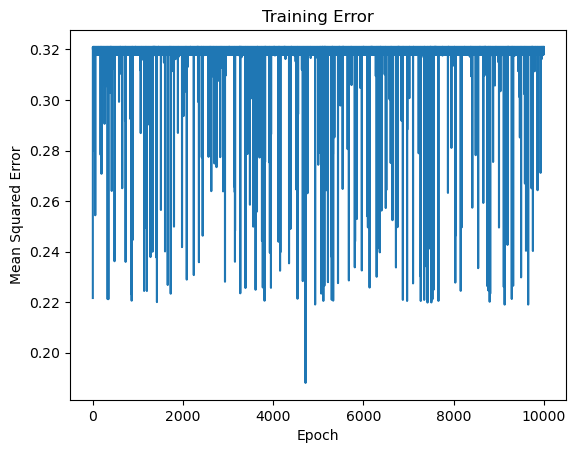

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


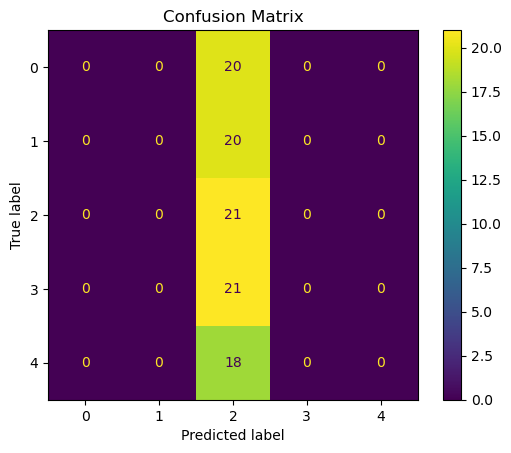

Accuracy: 0.21
Precision: 0.0441
Recall: 0.21
F1 Score: 0.07289256198347108


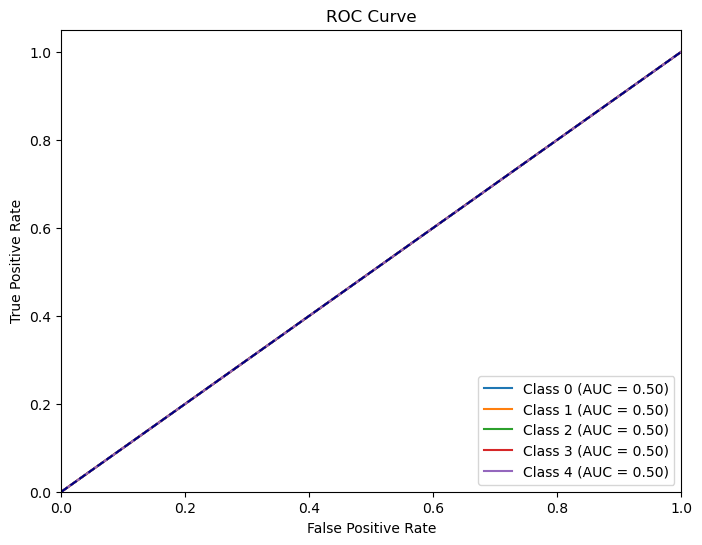

---------------------------------------------
Evaluating Model with Configuration: {'hidden_layers': (20, 20, 20), 'learning_rate': 0.1}


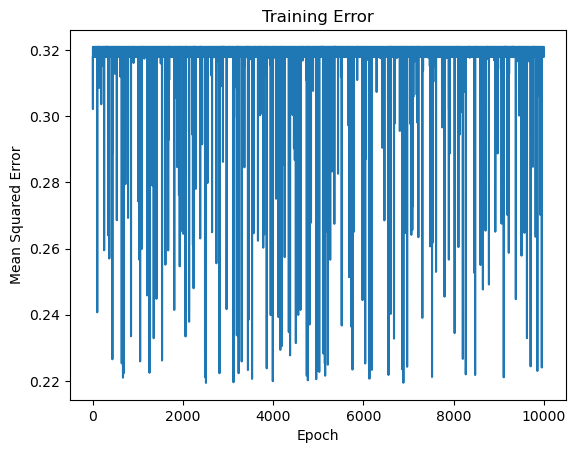

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


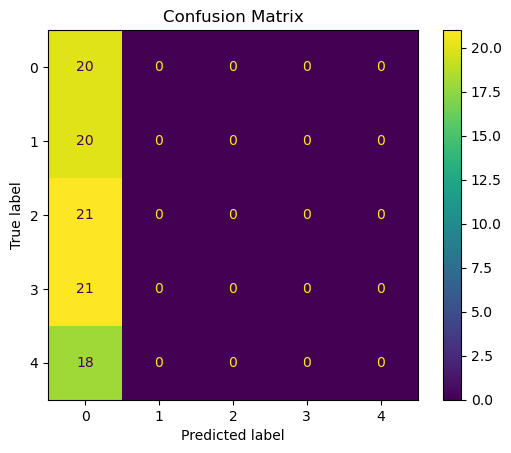

Accuracy: 0.2
Precision: 0.04
Recall: 0.2
F1 Score: 0.06666666666666668


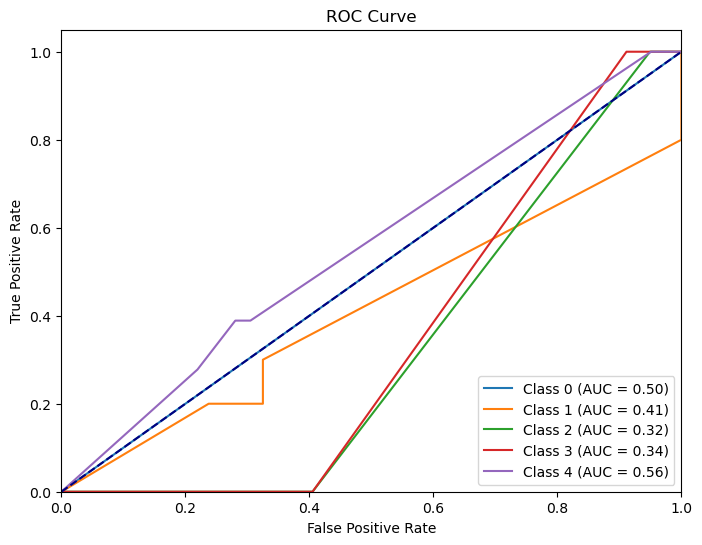

---------------------------------------------
Evaluating Model with Configuration: {'hidden_layers': (5, 5, 5), 'learning_rate': 0.3}


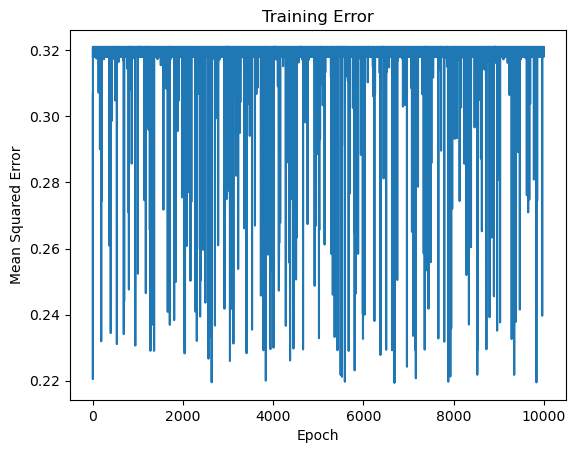

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


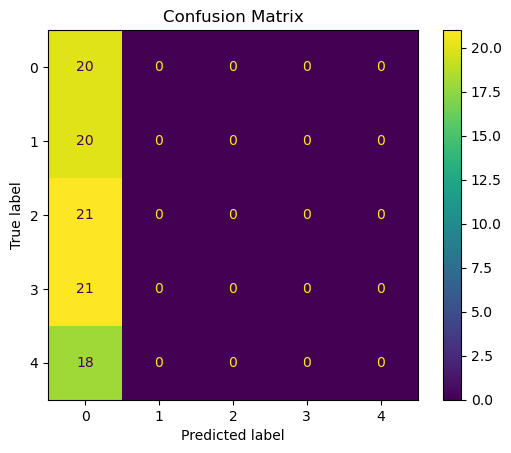

Accuracy: 0.2
Precision: 0.04
Recall: 0.2
F1 Score: 0.06666666666666668


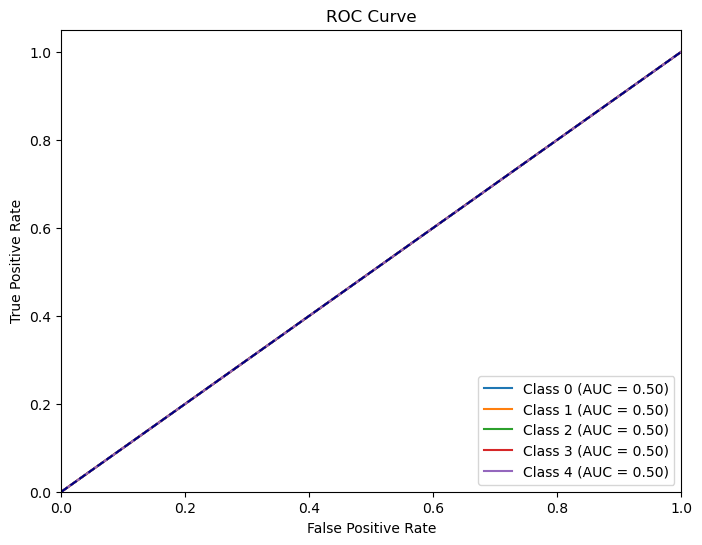

---------------------------------------------


In [5]:
# Here, evaluting the model with test and trining data
def evaluate_model(X_test, Y_test, model):
    Y_pred = model.predict(X_test)
    Y_proba = model.predict_proba(X_test)

    # hERE, Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(Y_test, axis=1), Y_pred)
    precision = precision_score(np.argmax(Y_test, axis=1), Y_pred, average='weighted')
    recall = recall_score(np.argmax(Y_test, axis=1), Y_pred, average='weighted')
    f1 = f1_score(np.argmax(Y_test, axis=1), Y_pred, average='weighted')

    # Here, calculate confusion matrix
    cm = confusion_matrix(np.argmax(Y_test, axis=1), Y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(np.argmax(Y_test, axis=1)))
    disp.plot()
    plt.title("Confusion Matrix")
    plt.show()

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(Y))):
        fpr, tpr, _ = roc_curve((np.argmax(Y_test, axis=1) == i).astype(int), Y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Training and evaluating the model with different configurations
configurations = [
    {"hidden_layers": (10, 10, 10), "learning_rate": 0.2},
    {"hidden_layers": (20, 20, 20), "learning_rate": 0.1},
    {"hidden_layers": (5, 5, 5), "learning_rate": 0.3}
]

# Loop through each configuration and evaluate the model
for config in configurations:
    print(f"Evaluating Model with Configuration: {config}")
    NN_model = NeuralNetwork(hidden_layers=config["hidden_layers"], learning_rate=config["learning_rate"])
     # Train the model for a fixed number of epochs and collect the training error
    err = []
    for _ in range(10000):
        NN_model.train(X_train, Y_train)
        err.append(np.mean(np.square(Y_train - NN_model.feedForward(X_train))))
    plt.plot(err)
    plt.title("Training Error")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.show()
    evaluate_model(X_test, Y_test, NN_model)
    print("---------------------------------------------")